# Multiple Regression Analysis

## Objectives

- Explore the relationship between sales and multiple advertising channels (TV, Radio, Newspaper) using multiple linear regression.
- Evaluate the model's effectiveness using statistical metrics like R² and RMSE.

## Background

This analysis extends simple linear to multiple linear regression to understand how advertising expenditures affect product sales across different markets. It involves assessing the significance of each advertising medium on sales, employing both Scikit-Learn and Statsmodels libraries for robust statistical inference.

## Datasets Used

Advertising.csv: Sales data across 200 markets with corresponding TV, radio, and newspaper advertising budgets.

## Introduction

Multiple Linear Regression is an extension of Simple Linear regression that takes more than one independent variable to predict the response variable.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(rc={"figure.figsize":(6, 4)}) 

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

## The Data

The Advertising data set consists of the sales of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [3]:
# Getting data
df = pd.read_csv('advertising.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Descriptive Analysis

In [4]:
# Features matrix
X = df[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


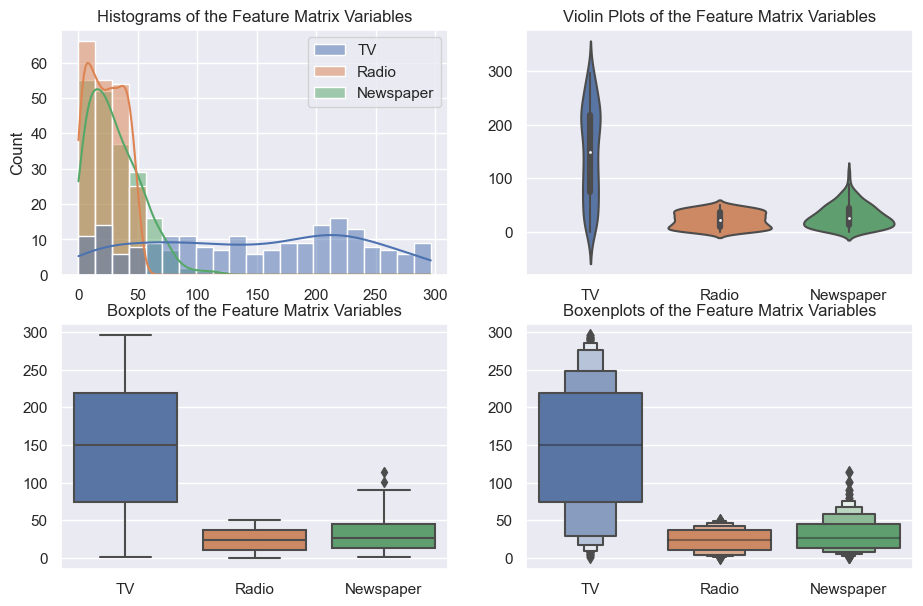

In [5]:
plt.figure(figsize=(11, 7))

plt.subplot(221)
sns.histplot(data = X, kde=True).set(title="Histograms of the Feature Matrix Variables")

plt.subplot(222)
sns.violinplot(data = X).set(title="Violin Plots of the Feature Matrix Variables")

plt.subplot(223)
sns.boxplot(data = X).set(title="Boxplots of the Feature Matrix Variables")

plt.subplot(224)
sns.boxenplot(data = X).set(title="Boxenplots of the Feature Matrix Variables");

In [6]:
# Target array
y = df['Sales']

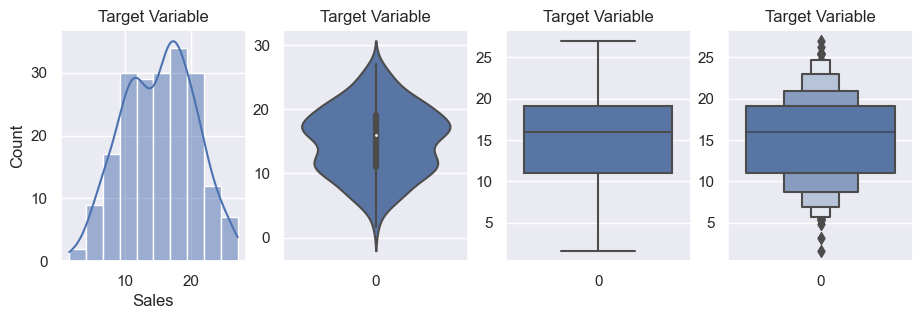

In [7]:
plt.figure(figsize=(11, 3))

plt.subplot(141)
sns.histplot(data = y, kde=True).set(title="Target Variable")

plt.subplot(142)
sns.violinplot(data = y).set(title="Target Variable")

plt.subplot(143)
sns.boxplot(data = y).set(title="Target Variable")

plt.subplot(144)
sns.boxenplot(data = y).set(title="Target Variable");

We can visualize the correlation matrix using a heatmap graph.

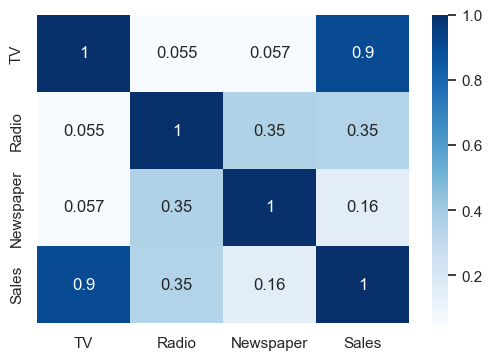

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='Blues');

The last row shows the correlation of Sales with the predictor variables.

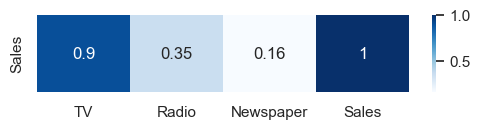

In [9]:
plt.figure(figsize=(6,1))
sns.heatmap(df.corr().tail(1), annot=True, cmap='Blues');

`Sales` has a high correlation with `TV`, lesser with `Radio`, and almost none with `Newspaper`.

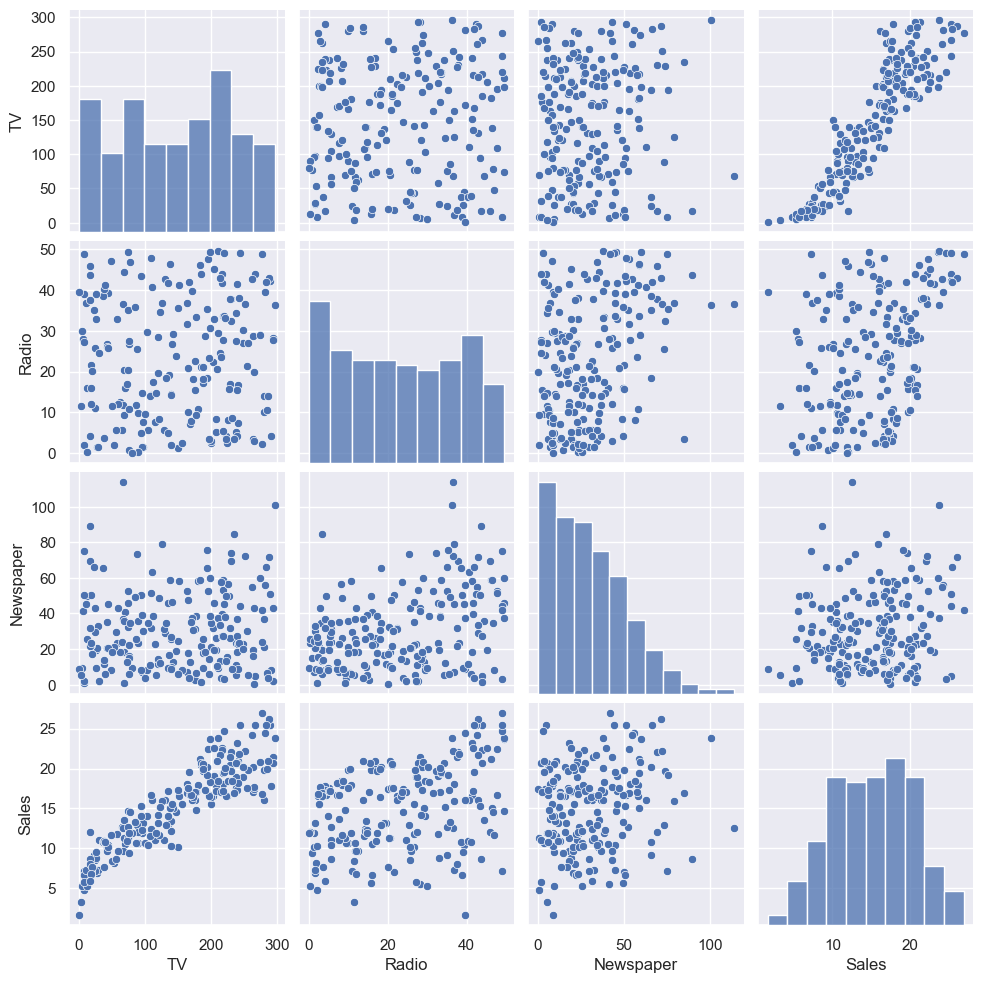

In [10]:
sns.pairplot(df);

## Multiple Linear Regression

Multiple linear regression model:

$
y = a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n
$

where: 

- $y$: dependent variable, 
- $a_0$: intercept, 
- $a_1, a_2, ... a_n$: model coefficients, 
- $x_1, x_2, ..., x_n$: independent variables.


In [11]:
# The independent variables are in the feature matrix.
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
# Target variable
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20) 
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train.shape[0], X_test.shape[0])) 

Train Set: 140 cases, 	Test Set: 60 cases


In [14]:
# Saving training data
data_train = pd.concat([X_train, y_train], axis=1)
print(data_train.shape)
data_train.head()

(140, 4)


,TV,Radio,Newspaper,Sales
134,36.9,38.6,65.6,10.8
62,239.3,15.5,27.3,20.7
20,218.4,27.7,53.4,18.0
21,237.4,5.1,23.5,17.5
45,175.1,22.5,31.5,16.1


In [15]:
# Saving testing data
data_test = pd.concat([X_test, y_test], axis=1)
print(data_test.shape)
data_test.head()

(60, 4)


,TV,Radio,Newspaper,Sales
150,280.7,13.9,37.0,16.1
28,248.8,27.1,22.9,18.9
13,97.5,7.6,7.2,13.7
178,276.7,2.3,23.7,16.8
109,255.4,26.9,5.5,19.8


## Using Scikit-Learn library

In [16]:
model = linear_model.LinearRegression()

In [17]:
# Fitting the Multiple Linear Regression model
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Getting the coefficients
print('Coefficients =', model.coef_)
print('Intercept = %.2f' %(model.intercept_))

Coefficients = [ 0.05242112  0.11272251 -0.00049419]
Intercept = 4.90


In [19]:
# Model Equation
print("The linear model is: y = %.4f + %.4fTV + %.4fRadio + %.4fNewspaper" 
                %(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2])) 

The linear model is: y = 4.9046 + 0.0524TV + 0.1127Radio + -0.0005Newspaper


In [20]:
# Computing R²
print('R² = %.3f ' %(model.score(X = X_train, y = y_train)))

R² = 0.919 



In [21]:
# Prediction with training cases
data_train['y_pred'] = model.predict(X_train)
data_train['res'] = data_train.Sales - data_train.y_pred
data_train.head()

,TV,Radio,Newspaper,Sales,y_pred,res
134,36.9,38.6,65.6,10.8,11.157619,-0.357619
62,239.3,15.5,27.3,20.7,19.182690,1.517310
20,218.4,27.7,53.4,18.0,19.449405,-1.449405
21,237.4,5.1,23.5,17.5,17.912654,-0.412654
45,175.1,22.5,31.5,16.1,16.604237,-0.504237


In [22]:
# Prediction with testing cases
data_test['y_pred'] = model.predict(X_test)
data_test['res'] = data_test.Sales - data_test.y_pred
data_test.head()

,TV,Radio,Newspaper,Sales,y_pred,res
150,280.7,13.9,37.0,16.1,21.167775,-5.067775
28,248.8,27.1,22.9,18.9,20.990446,-2.090446
13,97.5,7.6,7.2,13.7,10.868801,2.831199
178,276.7,2.3,23.7,16.8,19.657082,-2.857082
109,255.4,26.9,5.5,19.8,21.322480,-1.522480


### Computing R²

In [23]:
# Computing R²
print('Training Set: R² = %.3f' %(r2_score(data_train.Sales, data_train.y_pred)))
print('Testing  Set: R² = %.3f' %(r2_score(data_test.Sales, data_test.y_pred)))

Training Set: R² = 0.919
Testing  Set: R² = 0.870


### Q-Q Plots

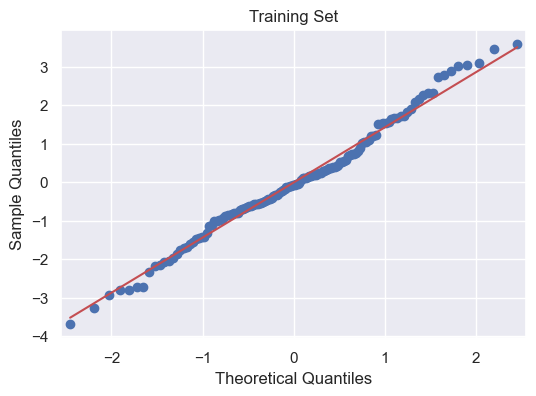

In [24]:
qqplot(data_train.res, line='s')
plt.title('Training Set');

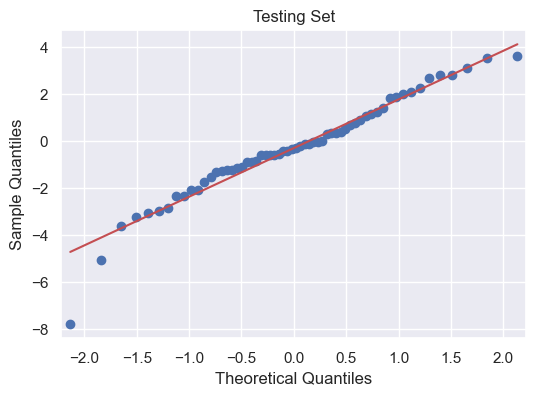

In [25]:
qqplot(data_test.res, line='s')
plt.title('Testing Set');

### Computing RMSE

In [26]:
# Computing RMSE 
print('Training Set - RMSE = %.2f' %(mean_squared_error(data_train.Sales, data_train.y_pred, squared=False)))
print('Testing  Set - RMSE = %.2f' %(mean_squared_error(data_test.Sales, data_test.y_pred, squared=False)))

Training Set - RMSE = 1.43
Testing  Set - RMSE = 2.09


## Using statsmodels library

Statsmodels is a Python library that provides functions for: 
- estimating many statistical models, 
- conducting statistical tests, 
- and making multiple statistical data explorations.

### Model 1 with statsmodels library

Let's use the training set with the following variables for creating a linear model with the `statsmodels` library.

- Independent variables: `TV`, `Radio`, and `Newspaper`

- Dependent variable: `Sales`

In [27]:
# Using statsmodels
Xc1_train = sm.add_constant(X_train) 
Xc1_train.head()

,const,TV,Radio,Newspaper
134,1.0,36.9,38.6,65.6
62,1.0,239.3,15.5,27.3
20,1.0,218.4,27.7,53.4
21,1.0,237.4,5.1,23.5
45,1.0,175.1,22.5,31.5


In [28]:
# Fitting the model
est = sm.OLS(y_train, Xc1_train) 
model1 = est.fit() 

In [29]:
model1.params

const        4.904609
TV           0.052421
Radio        0.112723
Newspaper   -0.000494
dtype: float64

In [30]:
# Model Equation
print("The linear model is: y = %.4f + %.4fTV + %.4fRadio + %.4fNewspaper" 
                %(model1.params[0], model1.params[1], model1.params[2], model1.params[3])) 

The linear model is: y = 4.9046 + 0.0524TV + 0.1127Radio + -0.0005Newspaper


In [31]:
# Prediction with training cases
data_train['y_pred1'] = model1.predict(Xc1_train)
data_train['res1'] = data_train.Sales - data_train.y_pred1
data_train.head()

,TV,Radio,Newspaper,Sales,y_pred,res,y_pred1,res1
134,36.9,38.6,65.6,10.8,11.157619,-0.357619,11.157619,-0.357619
62,239.3,15.5,27.3,20.7,19.182690,1.517310,19.182690,1.517310
20,218.4,27.7,53.4,18.0,19.449405,-1.449405,19.449405,-1.449405
21,237.4,5.1,23.5,17.5,17.912654,-0.412654,17.912654,-0.412654
45,175.1,22.5,31.5,16.1,16.604237,-0.504237,16.604237,-0.504237


Notice `y_pred`=`y_pred1` and `res`=`res1`.

For getting the prediction with the test cases, we should first create the variable `Xc1_test`.

In [32]:
Xc1_test = sm.add_constant(X_test) 
Xc1_test.head()

,const,TV,Radio,Newspaper
150,1.0,280.7,13.9,37.0
28,1.0,248.8,27.1,22.9
13,1.0,97.5,7.6,7.2
178,1.0,276.7,2.3,23.7
109,1.0,255.4,26.9,5.5


In [33]:
# Prediction with testing cases
data_test['y_pred1'] = model1.predict(Xc1_test)
data_test['res1'] = data_test.Sales - data_test.y_pred1
data_test.head()

,TV,Radio,Newspaper,Sales,y_pred,res,y_pred1,res1
150,280.7,13.9,37.0,16.1,21.167775,-5.067775,21.167775,-5.067775
28,248.8,27.1,22.9,18.9,20.990446,-2.090446,20.990446,-2.090446
13,97.5,7.6,7.2,13.7,10.868801,2.831199,10.868801,2.831199
178,276.7,2.3,23.7,16.8,19.657082,-2.857082,19.657082,-2.857082
109,255.4,26.9,5.5,19.8,21.322480,-1.522480,21.322480,-1.522480


Notice `y_pred`=`y_pred1` and `res`=`res1`.

In [34]:
# Getting the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     511.5
Date:                Thu, 02 May 2024   Prob (F-statistic):           7.57e-74
Time:                        10:03:02   Log-Likelihood:                -248.91
No. Observations:                 140   AIC:                             505.8
Df Residuals:                     136   BIC:                             517.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9046      0.318     15.446      0.0

`R² = 0.919`

We want to know whether there is a statistically significant relationship between the predictor and response variables. For it, we perform a t-test for each regression coefficient. 

$$H_0: a_i = 0$$
$$H_a: a_i ≠ 0$$

In [35]:
# Getting the t-values
model1.tvalues

const        15.446425
TV           35.504888
Radio        12.617942
Newspaper    -0.084119
dtype: float64

In [36]:
# Getting the p-values
round(model1.pvalues, 3)

const        0.000
TV           0.000
Radio        0.000
Newspaper    0.933
dtype: float64

Notice that in the Newspaper row, `P>|t|` = `0.933`. The Newspaper variable is not significant. Let's remove it! 

### Model 2 with statsmodels library

Let's use the training set with the following variables for creating a linear model with the `statsmodels` library.

- Independent variables: `TV`, and `Radio`

- Dependent variable: `Sales`

In [37]:
Xc2_train = sm.add_constant(X_train[['TV','Radio']]) 
Xc2_train.head()

,const,TV,Radio
134,1.0,36.9,38.6
62,1.0,239.3,15.5
20,1.0,218.4,27.7
21,1.0,237.4,5.1
45,1.0,175.1,22.5


The `y_train` variable will remain the same.

In [38]:
# Fitting the model
est = sm.OLS(y_train, Xc2_train) 
model2 = est.fit() 

In [39]:
# Model Equation
print("The linear model is: y = %.4f + %.4fTV + %.4fRadio" 
                %(model2.params[0], model2.params[1], model2.params[2])) 

The linear model is: y = 4.8965 + 0.0524TV + 0.1125Radio


In [40]:
# Prediction with training cases
data_train['y_pred2'] = model2.predict(Xc2_train)
data_train['res2'] = data_train.Sales - data_train.y_pred2
data_train.head()

,TV,Radio,Newspaper,Sales,y_pred,res,y_pred1,res1,y_pred2,res2
134,36.9,38.6,65.6,10.8,11.157619,-0.357619,11.157619,-0.357619,11.171190,-0.371190
62,239.3,15.5,27.3,20.7,19.182690,1.517310,19.182690,1.517310,19.181528,1.518472
20,218.4,27.7,53.4,18.0,19.449405,-1.449405,19.449405,-1.449405,19.458074,-1.458074
21,237.4,5.1,23.5,17.5,17.912654,-0.412654,17.912654,-0.412654,17.912423,-0.412423
45,175.1,22.5,31.5,16.1,16.604237,-0.504237,16.604237,-0.504237,16.603907,-0.503907


In [41]:
# Creating Xc2_test
Xc2_test = sm.add_constant(X_test[['TV','Radio']]) 
Xc2_test.head()

,const,TV,Radio
150,1.0,280.7,13.9
28,1.0,248.8,27.1
13,1.0,97.5,7.6
178,1.0,276.7,2.3
109,1.0,255.4,26.9


In [42]:
# Prediction with testing cases
data_test['y_pred2'] = model2.predict(Xc2_test)
data_test['res2'] = data_test.Sales - data_test.y_pred2
data_test.head()

,TV,Radio,Newspaper,Sales,y_pred,res,y_pred1,res1,y_pred2,res2
150,280.7,13.9,37.0,16.1,21.167775,-5.067775,21.167775,-5.067775,21.171425,-5.071425
28,248.8,27.1,22.9,18.9,20.990446,-2.090446,20.990446,-2.090446,20.983902,-2.083902
13,97.5,7.6,7.2,13.7,10.868801,2.831199,10.868801,2.831199,10.861231,2.838769
178,276.7,2.3,23.7,16.8,19.657082,-2.857082,19.657082,-2.857082,19.657312,-2.857312
109,255.4,26.9,5.5,19.8,21.322480,-1.522480,21.322480,-1.522480,21.307325,-1.507325


In [43]:
# Getting the model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     772.9
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.41e-75
Time:                        10:03:02   Log-Likelihood:                -248.92
No. Observations:                 140   AIC:                             503.8
Df Residuals:                     137   BIC:                             512.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8965      0.301     16.246      0.0

### Computing R²

In [44]:
# Computing R² on Training Sets
print('Model 1 - Training Set - R² = %.3f' %(model1.rsquared))
print('Model 2 - Training Set - R² = %.3f' %(model2.rsquared))

Model 1 - Training Set - R² = 0.919
Model 2 - Training Set - R² = 0.919


In [45]:
# Computing R² on Testing Sets
print('Model 1 - Testing Set - R² = %.3f' %(r2_score(data_test.Sales, data_test.y_pred1)))
print('Model 2 - Testing Set - R² = %.3f' %(r2_score(data_test.Sales, data_test.y_pred2)))

Model 1 - Testing Set - R² = 0.870
Model 2 - Testing Set - R² = 0.870


### Computing RMSE for model comparison

In [46]:
# Computing RMSE on Training Sets
print('Model 1 - Training Set - RMSE = %.5f' %(mean_squared_error(data_train.Sales, data_train.y_pred1, squared=False)))
print('Model 2 - Training Set - RMSE = %.5f' %(mean_squared_error(data_train.Sales, data_train.y_pred2, squared=False)))

Model 1 - Training Set - RMSE = 1.43190
Model 2 - Training Set - RMSE = 1.43193


In [47]:
# Computing RMSE on Testing Sets
print('Model 1 - Testing  Set - RMSE = %.5f' %(mean_squared_error(data_test.Sales, data_test.y_pred1, squared=False)))
print('Model 2 - Testing  Set - RMSE = %.5f' %(mean_squared_error(data_test.Sales, data_test.y_pred2, squared=False)))

Model 1 - Testing  Set - RMSE = 2.09286
Model 2 - Testing  Set - RMSE = 2.09261

Model 2 - Testing  Set - RMSE = 2.09261


Remember, the lower the RMSE, the better a model fits a dataset. As you can see, both models are practically the same.

## Conclusions

Key Takeaways:
- The multiple regression model identified TV and Radio as significant predictors of sales, whereas Newspaper advertising showed no significant effect.
- The model achieved an R² of 0.919 in the training set and 0.870 in the testing set, indicating a strong predictive power and an excellent generalization to unseen data.
- RMSE values for the training and testing sets were approximately 1.43 and 2.09, respectively, suggesting reasonable prediction accuracy.
- Statistical tests confirmed the newspaper's insignificance as a predictor, leading to its exclusion in a refined model. This model maintained similar performance metrics, confirming the robustness of the model without the Newspaper variable.

## References

- https://www.statsmodels.org/stable/regression.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5